# Disclaimer
En este script se realizará la fase de modelado de la problemática, teniendo en cuenta tanto diferentes posibles modelos, como técnicas (ensamble, redes neuronales, etc.)

In [24]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ------------- -------------------------- 19.7/56.8 MB 108.2 MB/s eta 0:00:01
   ------------------------------ --------- 43.8/56.8 MB 113.6 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 105.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports generales
import pandas as pd
import io
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import cluster
import sklearn.metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.metrics import davies_bouldin_score

In [3]:
path = 'C:/Users/Usuario/Documents/TFM/'


In [4]:
base = pd.read_excel(path + 'Base_modelado.xlsx')
mpios = pd.read_excel( path + 'DNP mpios2025 base mpios.xlsx', sheet_name = 'Municipios')

famd = pd.read_csv( path + 'FAMD_municipios.csv', sep = ';')
embed = pd.read_excel( path + 'Embeding_MPIO_ANIO_ajustados_otros.xlsx')


base

,Unnamed: 0,ID,ENTIDAD,ESTADO,CLASIFICACION,SEXO,EDAD_GRUPO,EDAD_QUINQ,CICLO_VIT,EST_CIVIL,...,FECHA_DES,ANIO_DES,MES_DES,DIA_DES,PAIS_DES,DEPTO,DEPTO_DES,MPIO,MPIO_DES,ZONA_DES
0,0,1,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,SIN_INFO,Hombre,Mayores_edad,(20 a 24),Juventud,Soltero,...,2006-12-29,2006,diciembre,viernes,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,cabec_mpal
1,1,2,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,SIN_INFO,Hombre,Mayores_edad,(20 a 24),Juventud,Soltero,...,2006-12-26,2006,diciembre,martes,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,cabec_mpal
2,2,3,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,SIN_INFO,Mujer,a) Menores de Edad (<18 aÃ±os),(10 a 14),Adolescencia,Soltero,...,2006-12-29,2006,diciembre,viernes,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,cabec_mpal
3,3,4,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio vivo,SIN_INFO,Mujer,a) Menores de Edad (<18 aÃ±os),(15 a 17),Adolescencia,Soltero,...,2006-12-29,2006,diciembre,viernes,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,cabec_mpal
4,4,5,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio vivo,SIN_INFO,Hombre,Mayores_edad,(70 a 74),Adulto_mayor,Union_libre,...,2006-12-31,2006,diciembre,domingo,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,cabec_mpal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190901,190901,193048,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,SIN_INFO,Hombre,Mayores_edad,(25 a 29),Juventud,Soltero,...,2007-01-01,2007,enero,lunes,Colombia,95,Guaviare,95001,San JosÃ© Del Guaviare,Rural
190902,190902,193049,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,SIN_INFO,Hombre,Mayores_edad,(18 a 19),Juventud,Soltero,...,2011-11-09,2011,noviembre,miÃ©rcoles,Colombia,5,Antioquia,5250,El Bagre,cabec_mpal
190903,190903,193050,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,SIN_INFO,Hombre,Mayores_edad,(20 a 24),Juventud,SIN_INFO,...,2001-01-01,2001,enero,lunes,Colombia,68,Santander,68235,El Carmen De Chucuri,SIN_INFO
190904,190904,193051,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,DES_FORZ,Mujer,Mayores_edad,(25 a 29),Juventud,SIN_INFO,...,1984-01-01,1984,enero,domingo,Colombia,68,Santander,68235,El Carmen De Chucuri,SIN_INFO


In [5]:
mpios['Tipología_2025'] = mpios['Tipología_2025'].astype(str)

mpios = mpios[['MPIO', 'CAT_ruralidad 2023']]

In [6]:
base['ANIO_MPIO'] = base['MPIO'].astype(str) + '_' + base['ANIO_DES'].astype(str)

In [7]:
base['ANIO_DES'] = base['ANIO_DES'].astype(str)

In [8]:
base = base.merge(mpios, on = 'MPIO', how = 'left')

In [9]:
base['CAT_ruralidad 2023'] = base['CAT_ruralidad 2023'].fillna('SIN_INFO')


In [10]:
reemplazos = { 
              'Aparecio vivo': 1,
              'Aparecio muerto': 1,
              'Desaparecido': 0}

base['ESTADO'] = base['ESTADO'].replace(reemplazos)

reemplazos = { 
              'basica_secundaria': 'Secundaria',
              'secundaria': 'Secundaria',
              'primaria': 'Primaria',
              'inicial y preescolar': 'Primaria',
              'profesional': 'Avanzada',
              'Universitario': 'Avanzada',
              'master o especializacion': 'Avanzada',
              'doctorado': 'Avanzada',
              'Sin escolaridad': 'Sin escolaridad',
              'SIN_INFO': 'SIN_INFO'}

base['ESCOLARIDAD'] = base['ESCOLARIDAD'].replace(reemplazos)


reemplazos = { 
              'Aparecio vivo': 'Aparecio',
              'Aparecio muerto': 'Aparecio',
              'Desaparecido': 'Desaparecido'}

base['ESTADO'] = base['ESTADO'].replace(reemplazos)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25824\1551899384.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['ESTADO'] = base['ESTADO'].replace(reemplazos)


In [11]:
#base = base[base['ANIO_DES']>= "2019"]

In [12]:
embed.columns

Index(['MUNICIPIO_ANIO', 'MPIO_ANIO_reclasificado', 'MPIO_ANIO_ID',
       'MPIO_ANIO_emb_0', 'MPIO_ANIO_emb_1', 'MPIO_ANIO_emb_2',
       'MPIO_ANIO_emb_3', 'MPIO_ANIO_emb_4', 'MPIO_ANIO_emb_5',
       'MPIO_ANIO_emb_6', 'MPIO_ANIO_emb_7', 'MPIO_ANIO_emb_8',
       'MPIO_ANIO_emb_9', 'MPIO_ANIO_emb_10', 'MPIO_ANIO_emb_11',
       'MPIO_ANIO_emb_12', 'MPIO_ANIO_emb_13', 'MPIO_ANIO_emb_14'],
      dtype='object')

In [13]:
import pandas as pd
import numpy as np

# Supongamos que tienes
# Base: tu DataFrame original con columnas 'MPIO' y 'ESTADO'
# a: Serie con el conteo de desapariciones por municipio
a = base.groupby('ANIO_MPIO')['ESTADO'].count()

# Opcional: revisa cuántos hay por municipio
counts = a

# Umbral de desapariciones
threshold = 20

# Identifica aquellos municipios con conteo menor que el umbral
mpios_menores = counts[counts < threshold].index

# Ahora creas una nueva columna, por ej. 'MPIO_reclasificado'
base['MPIO_ANIO_reclasificado'] = np.where(
    base['ANIO_MPIO'].isin(mpios_menores),
    'Otros',
    base['ANIO_MPIO']
)


# nombres = ['MUNICIPIO_ANIO', 'FAMD_0', 'FAMD_1', 'FAMD_2', 'FAMD_3', 'FAMD_4']
# famd.columns =  nombres

nombres = ['MUNICIPIO_ANIO', 'MPIO_ANIO_reclasificado', 'MPIO_ANIO_ID',
       'MPIO_ANIO_emb_0', 'MPIO_ANIO_emb_1', 'MPIO_ANIO_emb_2',
       'MPIO_ANIO_emb_3', 'MPIO_ANIO_emb_4', 'MPIO_ANIO_emb_5',
       'MPIO_ANIO_emb_6', 'MPIO_ANIO_emb_7', 'MPIO_ANIO_emb_8',
       'MPIO_ANIO_emb_9', 'MPIO_ANIO_emb_10', 'MPIO_ANIO_emb_11',
       'MPIO_ANIO_emb_12', 'MPIO_ANIO_emb_13', 'MPIO_ANIO_emb_14']
embed.columns =  nombres

### Cruce con FAMD

In [14]:
# base = base.merge(famd, right_on='MUNICIPIO_ANIO', left_on= 'ANIO_MPIO', how = 'left')

## Cruce con Embedding

In [15]:
embed.drop_duplicates(subset = 'MUNICIPIO_ANIO',inplace = True)
base = base.merge(embed, right_on='MUNICIPIO_ANIO', left_on= 'ANIO_MPIO', how = 'left')

# 🧾 Evaluación de columnas para el modelo de predicción (`ESTADO`)

| Columna         | Acción         |
|-----------------|----------------|
| `Unnamed: 0`    | ❌ **Quitar**   |
| `ID`            | ✅ **Pasa**     |
| `ENTIDAD`       | ❌ **Quitar**   |
| `ESTADO`        | 🎯 **Predecir** |
| `CLASIFICACION` | ✅ **Pasa**     |
| `SEXO`          | ✅ **Pasa**     |
| `EDAD_GRUPO`    | ❌ **Quitar**   |
| `EDAD_QUINQ`    | ❌ **Quitar**   |
| `CICLO_VIT`     | ✅ **Pasa**     |
| `EST_CIVIL`     | ✅ **Pasa**     |
| `ESCOLARIDAD`   | ✅ **Pasa**     |
| `PRT_GRUP`      | ❌ **Quitar**   |
| `FECHA_DES`     | ❌ **Quitar**   |
| `ANIO_DES`      | ✅ **Pasa**     |
| `MES_DES`       | ✅ **Pasa**     |
| `DIA_DES`       | ❌ **Quitar**   |
| `PAIS_DES`      | ❌ **Quitar**   |
| `DEPTO`         | ❌ **Quitar**   |
| `DEPTO_DES`     | ❌ **Quitar**   |
| `MPIO`          | ✅ **Pasa**     |
| `MPIO_DES`      | ❌ **Quitar**   |
| `ZONA_DES`      | ❌ **Quitar**   |
| `ANIO_MPIO`     | ❓ **Revisar**  |

---

### 🔍 Notas:

- 🎯 `ESTADO` es la **variable objetivo** (target).
- ✅ Columnas **seleccionadas** para el modelo.
- ❌ Columnas descartadas por ser irrelevantes, administrativas o redundantes.
- ❓ `ANIO_MPIO`: si es una llave compuesta (`municipio_año`), Depende del modelo, pasa o no



In [16]:
columnas_a_quitar = [
    'Unnamed: 0',
    'ENTIDAD',
    'EDAD_GRUPO',
    'EDAD_QUINQ',
    'PRT_GRUP',
    'FECHA_DES',
    'DIA_DES',
    'PAIS_DES',
    'DEPTO',
    'DEPTO_DES',
    'MPIO_DES',
    'ANIO_MPIO',
    'MPIO',
    'ZONA_DES',
    'MUNICIPIO_ANIO',
    'MPIO_ANIO_reclasificado_x',
    'MPIO_ANIO_reclasificado_y',
    'MPIO_ANIO_ID',
    'MES_DES',
    'ANIO_DES'
]

Base = base.drop(columns=columnas_a_quitar)


Base.set_index('ID', inplace = True)

In [17]:
Base.columns

Index(['ESTADO', 'CLASIFICACION', 'SEXO', 'CICLO_VIT', 'EST_CIVIL',
       'ESCOLARIDAD', 'CAT_ruralidad 2023', 'MPIO_ANIO_emb_0',
       'MPIO_ANIO_emb_1', 'MPIO_ANIO_emb_2', 'MPIO_ANIO_emb_3',
       'MPIO_ANIO_emb_4', 'MPIO_ANIO_emb_5', 'MPIO_ANIO_emb_6',
       'MPIO_ANIO_emb_7', 'MPIO_ANIO_emb_8', 'MPIO_ANIO_emb_9',
       'MPIO_ANIO_emb_10', 'MPIO_ANIO_emb_11', 'MPIO_ANIO_emb_12',
       'MPIO_ANIO_emb_13', 'MPIO_ANIO_emb_14'],
      dtype='object')

## Fase de modelado

## Empezamos la fase de modelado 

Ya con la base lista, empezaré a modelar la problemática con diferentes técnicas
Inicialmente:

- K vecinos más cercanos
- Random Forest
- XGBoost
- Logístico

## Opción 1: Variables Normales

Aquí tomamos las variables tal cual vienen en la bd con la diferencia de que usamos un aglomerado por tamaño de municipio.

### Regresión Logística

In [18]:
Base = Base.dropna()

In [19]:
Base

,ESTADO,CLASIFICACION,SEXO,CICLO_VIT,EST_CIVIL,ESCOLARIDAD,CAT_ruralidad 2023,MPIO_ANIO_emb_0,MPIO_ANIO_emb_1,MPIO_ANIO_emb_2,...,MPIO_ANIO_emb_5,MPIO_ANIO_emb_6,MPIO_ANIO_emb_7,MPIO_ANIO_emb_8,MPIO_ANIO_emb_9,MPIO_ANIO_emb_10,MPIO_ANIO_emb_11,MPIO_ANIO_emb_12,MPIO_ANIO_emb_13,MPIO_ANIO_emb_14
ID,,,,,,,,,,,,,,,,,,,,,
1,0,SIN_INFO,Hombre,Juventud,Soltero,Secundaria,Ciudades y aglomeraciones,-0.233515,0.229940,0.223468,...,0.182609,0.232895,-0.221277,-0.220405,0.193655,0.217458,0.185064,0.194149,0.199805,-0.155760
2,0,SIN_INFO,Hombre,Juventud,Soltero,Secundaria,Ciudades y aglomeraciones,-0.233515,0.229940,0.223468,...,0.182609,0.232895,-0.221277,-0.220405,0.193655,0.217458,0.185064,0.194149,0.199805,-0.155760
3,0,SIN_INFO,Mujer,Adolescencia,Soltero,Secundaria,Ciudades y aglomeraciones,-0.233515,0.229940,0.223468,...,0.182609,0.232895,-0.221277,-0.220405,0.193655,0.217458,0.185064,0.194149,0.199805,-0.155760
4,1,SIN_INFO,Mujer,Adolescencia,Soltero,Avanzada,Ciudades y aglomeraciones,-0.233515,0.229940,0.223468,...,0.182609,0.232895,-0.221277,-0.220405,0.193655,0.217458,0.185064,0.194149,0.199805,-0.155760
5,1,SIN_INFO,Hombre,Adulto_mayor,Union_libre,Primaria,Ciudades y aglomeraciones,-0.233515,0.229940,0.223468,...,0.182609,0.232895,-0.221277,-0.220405,0.193655,0.217458,0.185064,0.194149,0.199805,-0.155760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193048,0,SIN_INFO,Hombre,Juventud,Soltero,SIN_INFO,Rural,-0.361876,0.386909,0.393575,...,0.417523,0.328758,-0.369017,-0.406644,0.375692,0.425469,0.357956,0.340475,0.403404,-0.396239
193049,0,SIN_INFO,Hombre,Juventud,Soltero,Primaria,Intermedio,-0.305170,0.286862,0.322318,...,0.292268,0.288021,-0.310609,-0.297561,0.296113,0.281529,0.317248,0.303181,0.264986,-0.331226
193050,0,SIN_INFO,Hombre,Juventud,SIN_INFO,SIN_INFO,Rural disperso,-0.305170,0.286862,0.322318,...,0.292268,0.288021,-0.310609,-0.297561,0.296113,0.281529,0.317248,0.303181,0.264986,-0.331226


In [20]:
# pip install imblearn

In [22]:
from sklearn.model_selection import train_test_split

# # X: todas las columnas excepto 'ESTADO'
X = Base.drop(columns='ESTADO')

# y: variable objetivo
y = Base['ESTADO']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print("Distribución total:\n", y.value_counts(normalize=True).round(3))
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("Test:\n", y_test.value_counts(normalize=True).round(3))
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# X_encoded = pd.get_dummies(X, drop_first=True)

# # Split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_encoded, y, test_size=0.3, random_state=42, stratify=y
# )

# # SMOTE
# smote = SMOTE(random_state=42)
# X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

Distribución total:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Train:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Test:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from scipy.stats import loguniform, uniform
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# RANDOM_STATE = 42
# SCORING = "recall"  # para binaria; si fuera multiclase usa "f1_macro" o "roc_auc_ovr"

# # Detectar columnas
# cat_cols = X.select_dtypes(include="object").columns.tolist()
# num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# # --- Preprocesamiento ---
# transformers = []
# if num_cols:
#     # with_mean=False para preservar esparsidad cuando se combina con OneHotEncoder
#     transformers.append(("num", StandardScaler(with_mean=False), num_cols))
# if cat_cols:
#     transformers.append(("cat", OneHotEncoder(handle_unknown="ignore", drop=None), cat_cols))

# preprocessor = ColumnTransformer(transformers=transformers)

# # --- Pipeline ---
# base_clf = LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)
# pipeline = Pipeline(steps=[
#     ("preprocessing", preprocessor),
#     ("classifier", base_clf)
# ])

# # --- CV ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# # --- Búsqueda aleatoria (amplia) ---
# # Grids separados para respetar compatibilidades solver-penalty y evitar errores.
# param_distributions = [
#     # lbfgs con l2 / none
#     {
#         "classifier__solver": ["lbfgs"],
#         "classifier__penalty": ["l2", "none"],
#         "classifier__C": loguniform(1e-3, 1e3),
#         "classifier__class_weight": [None, "balanced"]
#     },
#     # liblinear con l1 / l2
#     {
#         "classifier__solver": ["liblinear"],
#         "classifier__penalty": ["l1", "l2"],
#         "classifier__C": loguniform(1e-3, 1e3),
#         "classifier__class_weight": [None, "balanced"]
#     },
#     # saga con l1 / l2
#     {
#         "classifier__solver": ["saga"],
#         "classifier__penalty": ["l1", "l2"],
#         "classifier__C": loguniform(1e-3, 1e3),
#         "classifier__class_weight": [None, "balanced"]
#     },
#     # saga con elasticnet (incluye l1_ratio)
#     {
#         "classifier__solver": ["saga"],
#         "classifier__penalty": ["elasticnet"],
#         "classifier__C": loguniform(1e-3, 1e3),
#         "classifier__l1_ratio": uniform(0, 1),
#         "classifier__class_weight": [None, "balanced"]
#     },
# ]

# rand_search = RandomizedSearchCV(
#     estimator=pipeline,
#     param_distributions=param_distributions,
#     n_iter=60,  # aumenta si quieres explorar más
#     scoring=SCORING,
#     cv=cv,
#     n_jobs=-1,
#     random_state=RANDOM_STATE,
#     verbose=1
# )

# rand_search.fit(X_train, y_train)
# print("Mejores params (Random Search):", rand_search.best_params_)
# print("Mejor puntuación CV (Random Search):", rand_search.best_score_)

# # --- Búsqueda en malla (refinamiento alrededor del mejor) ---
# best = rand_search.best_params_

# # vecindad para C (escala log)
# def around_C(c):
#     c = float(c)
#     grid = np.unique([c/10, c/3, c, c*3, c*10])
#     # evitar valores no válidos o extremadamente pequeños
#     return [g for g in grid if g > 1e-6]

# grid = {
#     "classifier__solver": [best["classifier__solver"]],
#     "classifier__penalty": [best["classifier__penalty"]],
#     "classifier__C": around_C(best.get("classifier__C", 1.0)) if best["classifier__penalty"] != "none" else [1.0],
#     "classifier__class_weight": [best.get("classifier__class_weight", None)]
# }

# # si es elasticnet, barrer alrededor de l1_ratio
# if best["classifier__penalty"] == "elasticnet":
#     br = float(best.get("classifier__l1_ratio", 0.5))
#     neigh = np.clip([br-0.2, br-0.1, br, br+0.1, br+0.2], 0.0, 1.0)
#     grid["classifier__l1_ratio"] = sorted(np.unique(neigh).tolist())

# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=grid,
#     scoring=SCORING,
#     cv=cv,
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)
# print("Mejores params (Grid Search):", grid_search.best_params_)
# print("Mejor puntuación CV (Grid Search):", grid_search.best_score_)

# # --- Entrenar modelo final con mejores hiperparámetros ---
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# # --- Predicción y evaluación como tenías ---
# y_pred = best_model.predict(X_test)

# print("Reporte de clasificación:")
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps["classifier"].classes_)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=best_model.named_steps["classifier"].classes_,
#             yticklabels=best_model.named_steps["classifier"].classes_)
# plt.xlabel('Predicho')
# plt.ylabel('Real')
# plt.title('Matriz de Confusión')
# plt.show()


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score

# # Tomamos el clasificador del pipeline y sus clases
# clf = best_model.named_steps["classifier"]
# classes = clf.classes_

# # Define la clase positiva (ajústala si tu "positivo" es distinto)
# pos_label = "Apareció" if "Apareció" in classes else classes[1]
# pos_idx = np.where(classes == pos_label)[0][0]

# # Probabilidades para la clase positiva
# y_score = best_model.predict_proba(X_test)[:, pos_idx]

# # y_true binaria (1 si es la clase positiva, 0 en caso contrario)
# y_true_bin = (y_test == pos_label).astype(int)

# # Curva ROC y AUC
# fpr, tpr, _ = roc_curve(y_true_bin, y_score)
# auc = roc_auc_score(y_true_bin, y_score)

# # Gráfico
# plt.figure()
# plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
# plt.plot([0, 1], [0, 1], "--", label="Aleatorio")
# plt.xlabel("FPR (1 - Especificidad)")
# plt.ylabel("TPR (Sensibilidad)")
# plt.title("Curva ROC - Regresión Logística")
# plt.legend()
# plt.grid(True)
# plt.show()


Fitting 5 folds for each of 60 candidates, totalling 300 fits


: 

: 

Distribución total:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Train:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Test:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Mejores params (Random Search): {'classifier__C': np.float64(0.0011008110571039537), 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Mejor Recall CV (Random Search): 0.7671
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Mejores params (Grid Search): {'classifier__C': np.float64(0.003302433171311861), 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Mejor Recall CV (Grid Search): 0.7675

== Reporte (umbral 0.5) ==
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     37005
           1       0.56      0.77      0.65     20267

    accuracy       

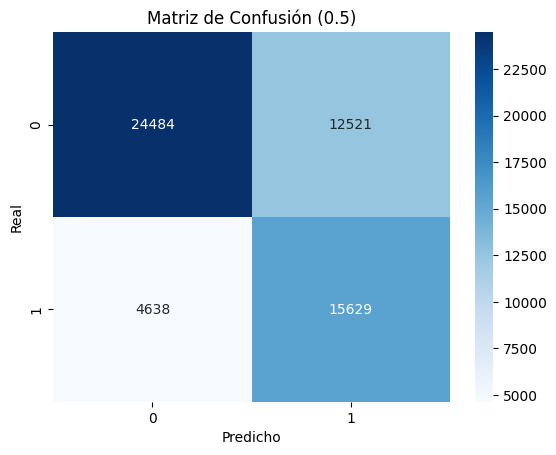

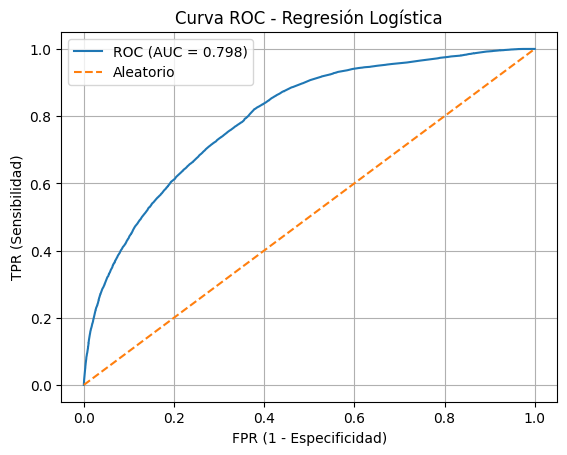

Umbral óptimo (F1 en train): 0.400

== Reporte con umbral óptimo ==
              precision    recall  f1-score   support

    Negativo       0.87      0.61      0.71     37005
    Positivo       0.54      0.83      0.65     20267

    accuracy                           0.69     57272
   macro avg       0.70      0.72      0.68     57272
weighted avg       0.75      0.69      0.69     57272



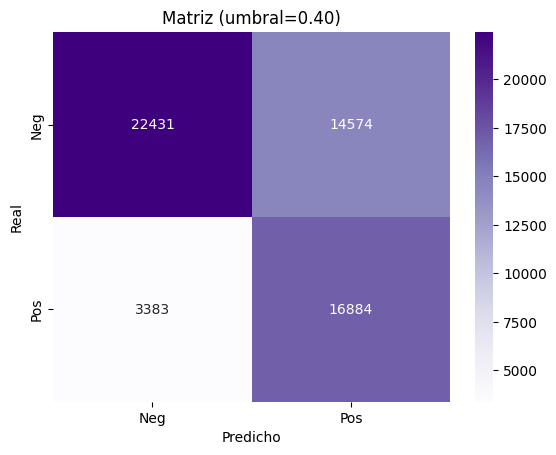

In [41]:
# =========================
# Setup
# =========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, f1_score)

from scipy.stats import loguniform, uniform

RANDOM_STATE = 42

# =========================
# (Opcional) Construir X, y
# =========================
# Si ya tienes X, y, deja esto comentado:
# X = Base.drop(columns="ESTADO")
# y = Base["ESTADO"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

print("Distribución total:\n", y.value_counts(normalize=True).round(3))
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("Test:\n", y_test.value_counts(normalize=True).round(3))

# =========================
# Preprocesamiento
# =========================
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# OneHotEncoder compatible con distintas versiones de sklearn
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

transformers = []
if num_cols:
    transformers.append(("num", StandardScaler(with_mean=False), num_cols))
if cat_cols:
    transformers.append(("cat", ohe, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# =========================
# Pipeline + CV
# =========================
base_clf = LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", base_clf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# -------------------------
# Randomized Search (amplia)
# -------------------------
param_distributions = [
    # lbfgs con l2 / none
    {
        "classifier__solver": ["lbfgs"],
        "classifier__penalty": ["l2", "none"],
        "classifier__C": loguniform(1e-3, 1e3),
        "classifier__class_weight": [None, "balanced"]
    },
    # liblinear con l1 / l2
    {
        "classifier__solver": ["liblinear"],
        "classifier__penalty": ["l1", "l2"],
        "classifier__C": loguniform(1e-3, 1e3),
        "classifier__class_weight": [None, "balanced"]
    },
    # saga con l1 / l2
    {
        "classifier__solver": ["saga"],
        "classifier__penalty": ["l1", "l2"],
        "classifier__C": loguniform(1e-3, 1e3),
        "classifier__class_weight": [None, "balanced"]
    },
    # saga con elasticnet
    {
        "classifier__solver": ["saga"],
        "classifier__penalty": ["elasticnet"],
        "classifier__C": loguniform(1e-3, 1e3),
        "classifier__l1_ratio": uniform(0, 1),
        "classifier__class_weight": [None, "balanced"]
    },
]

# Scoring múltiple pero refit por recall
scoring = {"recall": "recall", "f1": "f1", "roc_auc": "roc_auc"}

rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=60,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

rand_search.fit(X_train, y_train)
print("\nMejores params (Random Search):", rand_search.best_params_)
print("Mejor Recall CV (Random Search):", rand_search.cv_results_["mean_test_recall"][rand_search.best_index_].round(4))

# -------------------------
# Grid Search (refinamiento)
# -------------------------
best = rand_search.best_params_

def around_C(c):
    c = float(c)
    grid = np.unique([c/10, c/3, c, c*3, c*10])
    return [g for g in grid if g > 1e-6]

grid = {
    "classifier__solver": [best["classifier__solver"]],
    "classifier__penalty": [best["classifier__penalty"]],
    "classifier__C": around_C(best.get("classifier__C", 1.0)) if best["classifier__penalty"] != "none" else [1.0],
    "classifier__class_weight": [best.get("classifier__class_weight", None)],
}

if best["classifier__penalty"] == "elasticnet":
    br = float(best.get("classifier__l1_ratio", 0.5))
    neigh = np.clip([br-0.2, br-0.1, br, br+0.1, br+0.2], 0.0, 1.0)
    grid["classifier__l1_ratio"] = sorted(np.unique(neigh).tolist())

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=grid,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("\nMejores params (Grid Search):", grid_search.best_params_)
print("Mejor Recall CV (Grid Search):", grid_search.cv_results_["mean_test_recall"][grid_search.best_index_].round(4))

# =========================
# Entrenamiento final
# =========================
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# =========================
# Evaluación estándar (umbral 0.5)
# =========================
y_pred = best_model.predict(X_test)
print("\n== Reporte (umbral 0.5) ==")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps["classifier"].classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.named_steps["classifier"].classes_,
            yticklabels=best_model.named_steps["classifier"].classes_)
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title('Matriz de Confusión (0.5)')
plt.show()

# =========================
# ROC & AUC
# =========================
clf = best_model.named_steps["classifier"]
classes = clf.classes_

# Clase positiva robusta: 1 si y es 0/1; o "Apareció"; o la última clase
if np.issubdtype(type(classes[0]), np.number):
    pos_label = 1
else:
    pos_label = "Apareció" if "Apareció" in classes else classes[-1]
pos_idx = list(classes).index(pos_label)

y_score = best_model.predict_proba(X_test)[:, pos_idx]
y_true_bin = (y_test == pos_label).astype(int)

fpr, tpr, _ = roc_curve(y_true_bin, y_score)
auc = roc_auc_score(y_true_bin, y_score)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Aleatorio")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.title("Curva ROC - Regresión Logística")
plt.legend(); plt.grid(True); plt.show()

# =========================
# Ajuste de umbral (max F1 sobre train)
# =========================
probs_tr = best_model.predict_proba(X_train)[:, pos_idx]
ths = np.linspace(0.05, 0.95, 181)

scores = [(t, f1_score((y_train == pos_label).astype(int), probs_tr >= t)) for t in ths]
best_t = max(scores, key=lambda x: x[1])[0]
print(f"Umbral óptimo (F1 en train): {best_t:.3f}")

probs_te = best_model.predict_proba(X_test)[:, pos_idx]
y_pred_t = (probs_te >= best_t).astype(int)

print("\n== Reporte con umbral óptimo ==")
print(classification_report((y_test == pos_label).astype(int), y_pred_t, target_names=["Negativo","Positivo"]))

cm_t = confusion_matrix((y_test == pos_label).astype(int), y_pred_t)
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title(f'Matriz (umbral={best_t:.2f})')
plt.show()


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     37005
           1       0.67      0.49      0.57     20267

    accuracy                           0.73     57272
   macro avg       0.71      0.68      0.69     57272
weighted avg       0.73      0.73      0.72     57272



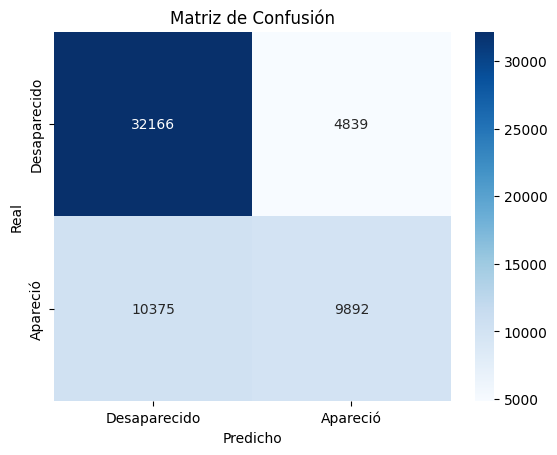

In [42]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Detectar columnas categóricas
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)
])


# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar
pipeline.fit(X_train, y_train)

# Predecir
y_pred = pipeline.predict(X_test)


# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Desaparecido', 'Apareció'], yticklabels=['Desaparecido', 'Apareció'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


### K Nearest neighbors

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     37005
           1       0.58      0.55      0.56     20267

    accuracy                           0.70     57272
   macro avg       0.67      0.66      0.67     57272
weighted avg       0.69      0.70      0.70     57272



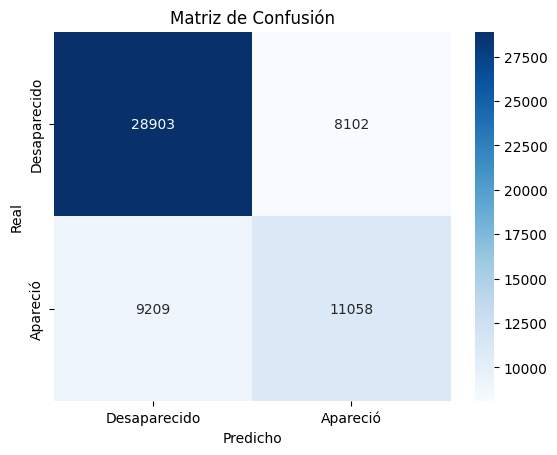

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)
])

# Pipeline con KNN
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Puedes ajustar n_neighbors
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Desaparecido', 'Apareció'], yticklabels=['Desaparecido', 'Apareció'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


## Nuevo codigo KNN

Distribución total:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Train:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Test:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Mejores params (Random Search): {'classifier__algorithm': 'auto', 'classifier__leaf_size': 28, 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 29, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Mejor Recall CV (Random Search): 0.5368
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Mejores params (Grid Search): {'classifier__algorithm': 'auto', 'classifier__leaf_size': 18, 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 35, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Mejor Recall CV (Grid Search): 0.5406

== Reporte (umbral 0.5) ==
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     37005
          

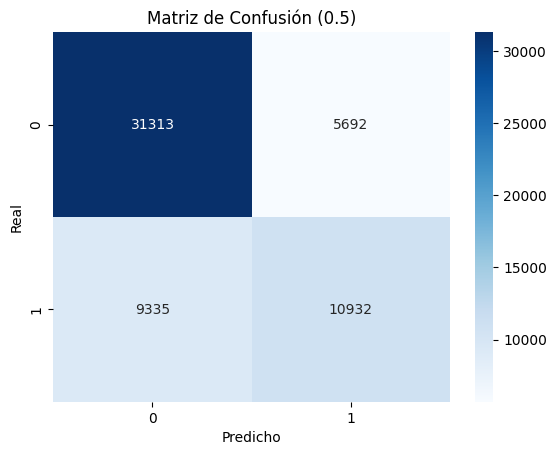

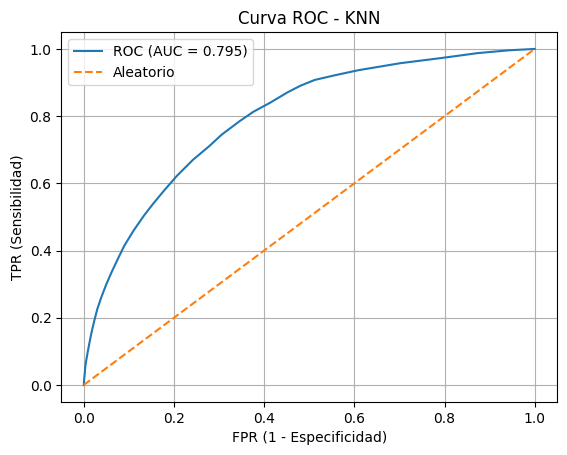

Umbral óptimo (F1 en train): 0.315

== Reporte con umbral óptimo ==
              precision    recall  f1-score   support

    Negativo       0.85      0.65      0.74     37005
    Positivo       0.55      0.78      0.65     20267

    accuracy                           0.70     57272
   macro avg       0.70      0.72      0.69     57272
weighted avg       0.74      0.70      0.71     57272



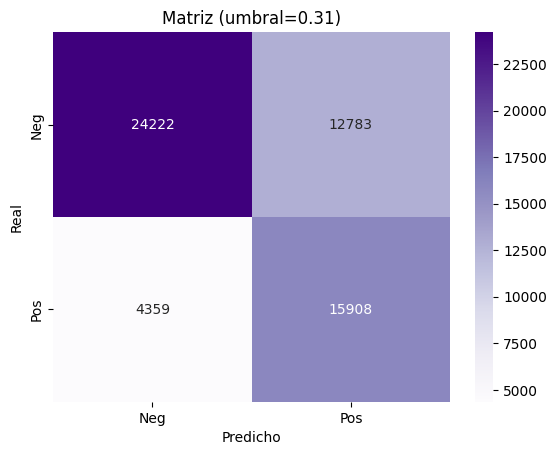

In [44]:
# =========================
# Setup
# =========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import loguniform, uniform, randint  # randint para K
RANDOM_STATE = 42

# =========================
# (Opcional) Construir X, y
# =========================
# X = Base.drop(columns="ESTADO")
# y = Base["ESTADO"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

print("Distribución total:\n", y.value_counts(normalize=True).round(3))
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("Test:\n", y_test.value_counts(normalize=True).round(3))

# =========================
# Preprocesamiento
# =========================
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# OneHotEncoder compatible con distintas versiones de sklearn
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

transformers = []
if num_cols:
    # KNN es sensible a escala → escalar numéricas
    transformers.append(("num", StandardScaler(with_mean=False), num_cols))
if cat_cols:
    # OHE deja 0/1; OK para distancias con KNN
    transformers.append(("cat", ohe, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# =========================
# Pipeline + CV
# =========================
knn = KNeighborsClassifier()

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", knn)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# -------------------------
# Randomized Search (amplia)
# -------------------------
# Nota: para KNN afinamos sobre K, pesos, métrica (p=1/2), algoritmo y leaf_size
param_distributions = {
    "classifier__n_neighbors": randint(3, 101),          # 3..100
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["minkowski"],                 # p=1 (L1), p=2 (L2)
    "classifier__p": [1, 2],
    "classifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "classifier__leaf_size": randint(15, 80),
}

# Scoring múltiple pero refit por recall
scoring = {"recall": "recall", "f1": "f1", "roc_auc": "roc_auc"}

rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=60,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

rand_search.fit(X_train, y_train)
print("\nMejores params (Random Search):", rand_search.best_params_)
print("Mejor Recall CV (Random Search):", rand_search.cv_results_["mean_test_recall"][rand_search.best_index_].round(4))

# -------------------------
# Grid Search (refinamiento)
# -------------------------
best = rand_search.best_params_

def around_K(k):
    k = int(k)
    vec = sorted(set([max(1, k-10), max(1, k-5), k, k+5, k+10]))
    # Preferir impares para binaria (menos empates)
    vec = [kk if kk % 2 == 1 else kk+1 for kk in vec]
    return sorted(set([kk for kk in vec if kk >= 1]))

grid = {
    "classifier__n_neighbors": around_K(best["classifier__n_neighbors"]),
    "classifier__weights": [best["classifier__weights"]],
    "classifier__metric": [best["classifier__metric"]],
    "classifier__p": [best["classifier__p"]],
    "classifier__algorithm": [best["classifier__algorithm"]],
    "classifier__leaf_size": sorted(set([max(10, best["classifier__leaf_size"]-10),
                                         best["classifier__leaf_size"],
                                         best["classifier__leaf_size"]+10])),
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=grid,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("\nMejores params (Grid Search):", grid_search.best_params_)
print("Mejor Recall CV (Grid Search):", grid_search.cv_results_["mean_test_recall"][grid_search.best_index_].round(4))

# =========================
# Entrenamiento final
# =========================
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# =========================
# Evaluación estándar (umbral 0.5)
# =========================
y_pred = best_model.predict(X_test)
print("\n== Reporte (umbral 0.5) ==")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps["classifier"].classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.named_steps["classifier"].classes_,
            yticklabels=best_model.named_steps["classifier"].classes_)
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title('Matriz de Confusión (0.5)')
plt.show()

# =========================
# ROC & AUC
# =========================
clf = best_model.named_steps["classifier"]
classes = clf.classes_

# Clase positiva robusta
if np.issubdtype(type(classes[0]), np.number):
    pos_label = 1
else:
    pos_label = "Apareció" if "Apareció" in classes else classes[-1]
pos_idx = list(classes).index(pos_label)

y_score = best_model.predict_proba(X_test)[:, pos_idx]
y_true_bin = (y_test == pos_label).astype(int)

fpr, tpr, _ = roc_curve(y_true_bin, y_score)
auc = roc_auc_score(y_true_bin, y_score)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Aleatorio")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.title("Curva ROC - KNN")
plt.legend(); plt.grid(True); plt.show()

# =========================
# Ajuste de umbral (max F1 sobre train)
# =========================
probs_tr = best_model.predict_proba(X_train)[:, pos_idx]
ths = np.linspace(0.05, 0.95, 181)

scores = [(t, f1_score((y_train == pos_label).astype(int), probs_tr >= t)) for t in ths]
best_t = max(scores, key=lambda x: x[1])[0]
print(f"Umbral óptimo (F1 en train): {best_t:.3f}")

probs_te = best_model.predict_proba(X_test)[:, pos_idx]
y_pred_t = (probs_te >= best_t).astype(int)

print("\n== Reporte con umbral óptimo ==")
print(classification_report((y_test == pos_label).astype(int), y_pred_t, target_names=["Negativo","Positivo"]))

cm_t = confusion_matrix((y_test == pos_label).astype(int), y_pred_t)
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title(f'Matriz (umbral={best_t:.2f})')
plt.show()


### Fin nuevo codigo KNN

### Random Forest

Distribución total:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Train:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Test:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Fitting 5 folds for each of 80 candidates, totalling 400 fits

Mejores params (Random Search): {'classifier__bootstrap': False, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 16, 'classifier__min_samples_split': 13, 'classifier__n_estimators': 752}
Mejor Recall CV (Random Search): 0.778
Fitting 5 folds for each of 500 candidates, totalling 2500 fits

Mejores params (Grid Search): {'classifier__bootstrap': False, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 3, 'classifier__n_estimators'

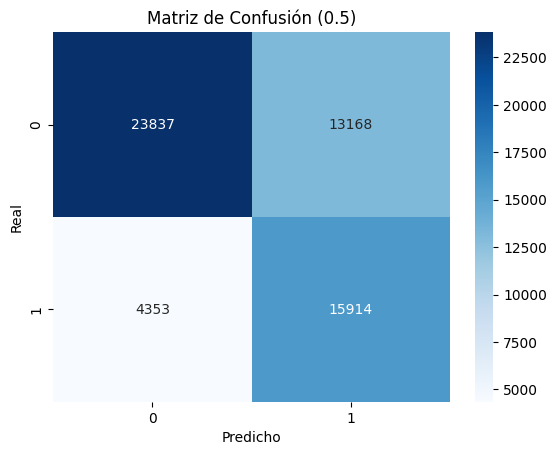

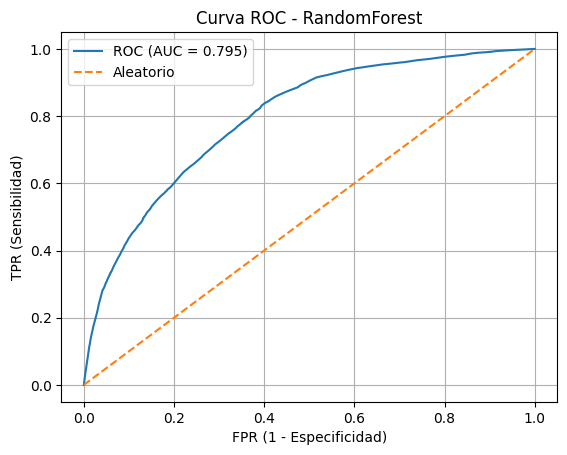

Umbral óptimo (F1 en train): 0.320

== Reporte con umbral óptimo ==
              precision    recall  f1-score   support

    Negativo       0.86      0.62      0.72     37005
    Positivo       0.54      0.81      0.65     20267

    accuracy                           0.69     57272
   macro avg       0.70      0.72      0.68     57272
weighted avg       0.75      0.69      0.70     57272



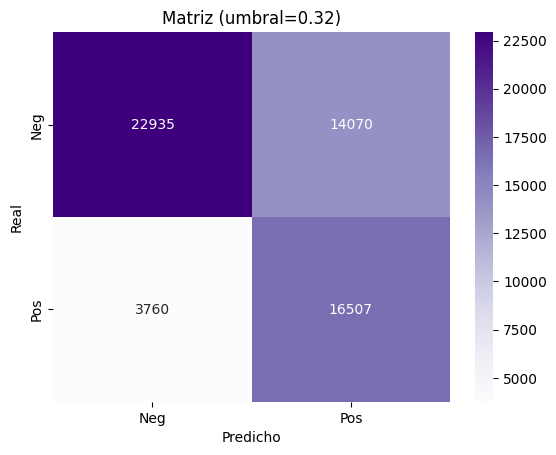

In [45]:
# =========================
# Setup
# =========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, f1_score)
from scipy.stats import randint

RANDOM_STATE = 42

# =========================
# (Opcional) Construir X, y
# =========================
# X = Base.drop(columns="ESTADO")
# y = Base["ESTADO"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

print("Distribución total:\n", y.value_counts(normalize=True).round(3))
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("Test:\n", y_test.value_counts(normalize=True).round(3))

# =========================
# Preprocesamiento
# =========================
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# OneHotEncoder compatible con distintas versiones de sklearn
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

transformers = []
if num_cols:
    transformers.append(("num", "passthrough", num_cols))  # árboles no requieren escala
if cat_cols:
    transformers.append(("cat", ohe, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# =========================
# Pipeline + CV
# =========================
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", rf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# -------------------------
# Randomized Search (amplia)
# -------------------------
param_distributions = {
    "classifier__n_estimators": randint(300, 1201),          # 300..1200
    "classifier__max_depth": randint(3, 41),                 # o None en el grid fino
    "classifier__min_samples_split": randint(2, 51),
    "classifier__min_samples_leaf": randint(1, 21),
    "classifier__max_features": ["sqrt", "log2", None],      # podrías probar floats en grid fino
    "classifier__bootstrap": [True, False],
    "classifier__class_weight": [None, "balanced", "balanced_subsample"],
    "classifier__criterion": ["gini", "entropy"],            # (o "log_loss" si tu versión lo soporta)
}

# Scoring múltiple pero refit por recall
scoring = {"recall": "recall", "f1": "f1", "roc_auc": "roc_auc"}

rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=80,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

rand_search.fit(X_train, y_train)
print("\nMejores params (Random Search):", rand_search.best_params_)
print("Mejor Recall CV (Random Search):", rand_search.cv_results_["mean_test_recall"][rand_search.best_index_].round(4))

# -------------------------
# Grid Search (refinamiento)
# -------------------------
best = rand_search.best_params_

def around_int(v, steps=(-10, -5, 0, 5, 10), lo=1, hi=None):
    vals = sorted(set([max(lo, (v + s)) for s in steps]))
    if hi is not None:
        vals = [x for x in vals if x <= hi]
    return vals

def around_depth(d):
    if d is None:  # por si quieres probar sin límite
        return [None, 8, 12, 16, 24, 32]
    d = int(d)
    return sorted(set([max(2, d-6), max(2, d-3), d, d+3, d+6]))

grid = {
    "classifier__n_estimators": around_int(int(best["classifier__n_estimators"]), steps=(-200,-100,0,100,200), lo=200),
    "classifier__max_depth": around_depth(best.get("classifier__max_depth", None)),
    "classifier__min_samples_split": around_int(int(best["classifier__min_samples_split"]), lo=2),
    "classifier__min_samples_leaf": around_int(int(best["classifier__min_samples_leaf"]), lo=1),
    "classifier__max_features": [best["classifier__max_features"]],
    "classifier__bootstrap": [best["classifier__bootstrap"]],
    "classifier__class_weight": [best.get("classifier__class_weight", None)],
    "classifier__criterion": [best["classifier__criterion"]],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=grid,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("\nMejores params (Grid Search):", grid_search.best_params_)
print("Mejor Recall CV (Grid Search):", grid_search.cv_results_["mean_test_recall"][grid_search.best_index_].round(4))

# =========================
# Entrenamiento final
# =========================
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# =========================
# Evaluación estándar (umbral 0.5)
# =========================
y_pred = best_model.predict(X_test)
print("\n== Reporte (umbral 0.5) ==")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps["classifier"].classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.named_steps["classifier"].classes_,
            yticklabels=best_model.named_steps["classifier"].classes_)
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title('Matriz de Confusión (0.5)')
plt.show()

# =========================
# ROC & AUC
# =========================
clf = best_model.named_steps["classifier"]
classes = clf.classes_

# Clase positiva robusta
if np.issubdtype(type(classes[0]), np.number):
    pos_label = 1
else:
    pos_label = "Apareció" if "Apareció" in classes else classes[-1]
pos_idx = list(classes).index(pos_label)

y_score = best_model.predict_proba(X_test)[:, pos_idx]
y_true_bin = (y_test == pos_label).astype(int)

fpr, tpr, _ = roc_curve(y_true_bin, y_score)
auc = roc_auc_score(y_true_bin, y_score)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Aleatorio")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.title("Curva ROC - RandomForest")
plt.legend(); plt.grid(True); plt.show()

# =========================
# Ajuste de umbral (max F1 sobre train)
# =========================
probs_tr = best_model.predict_proba(X_train)[:, pos_idx]
ths = np.linspace(0.05, 0.95, 181)

scores = [(t, f1_score((y_train == pos_label).astype(int), probs_tr >= t)) for t in ths]
best_t = max(scores, key=lambda x: x[1])[0]
print(f"Umbral óptimo (F1 en train): {best_t:.3f}")

probs_te = best_model.predict_proba(X_test)[:, pos_idx]
y_pred_t = (probs_te >= best_t).astype(int)

print("\n== Reporte con umbral óptimo ==")
print(classification_report((y_test == pos_label).astype(int), y_pred_t, target_names=["Negativo","Positivo"]))

cm_t = confusion_matrix((y_test == pos_label).astype(int), y_pred_t)
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title(f'Matriz (umbral={best_t:.2f})')
plt.show()


### VIEJO CODIGO

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Mejores hiperparámetros:
{'classifier__n_estimators': 150, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5820
           1       0.65      0.64      0.65      5714

    accuracy                           0.65     11534
   macro avg       0.65      0.65      0.65     11534
weighted avg       0.65      0.65      0.65     11534



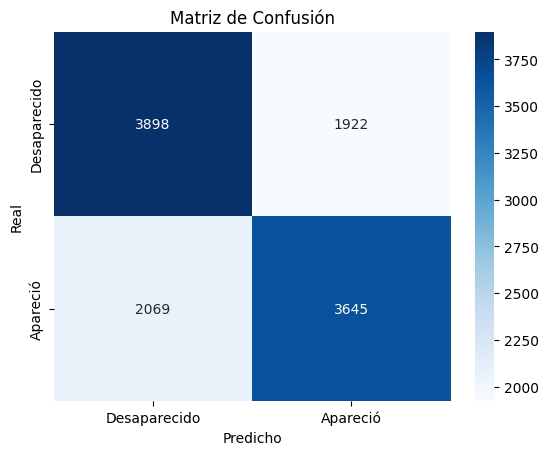

C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_22344\2021744891.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df.head(20), x='importance', y='feature', palette='viridis')


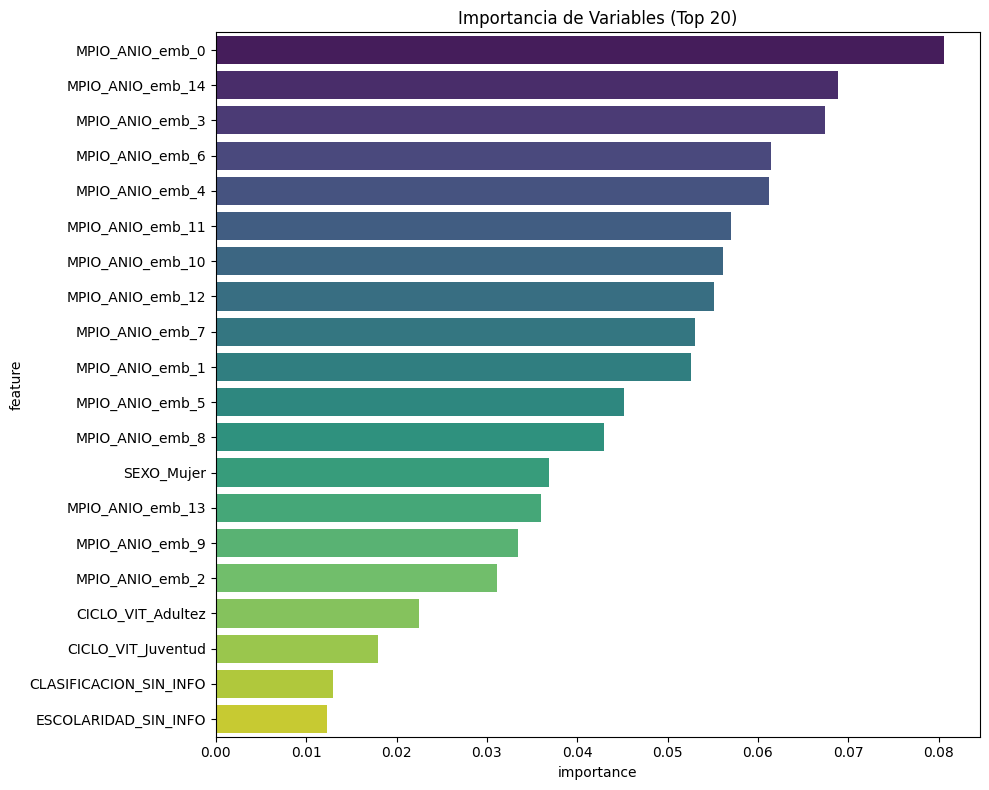

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import randint

# Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=15,  # intenta solo 10 combinaciones al azar
    cv=3,       # menos folds (más rápido que 5)
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenamiento
random_search.fit(X_train, y_train)

# Mejor modelo
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Predicciones
y_pred = best_model.predict(X_test)

# Reporte
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Desaparecido', 'Apareció'],
            yticklabels=['Desaparecido', 'Apareció'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# -------------------------------
# Importancia de variables
# -------------------------------

# Obtener nombres de variables transformadas
onehot = best_model.named_steps['preprocessing'].named_transformers_['cat']
cat_feature_names = onehot.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_cols, cat_feature_names])

# Obtener importancias
importances = best_model.named_steps['classifier'].feature_importances_

# Crear dataframe de importancias
importances_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Mostrar top 20
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df.head(20), x='importance', y='feature', palette='viridis')
plt.title('Importancia de Variables (Top 20)')
plt.tight_layout()
plt.show()



## XGBoost

Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\juan.bonilla\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparámetros:
{'classifier__subsample': 1, 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 1}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      5820
           1       0.66      0.63      0.64      5714

    accuracy                           0.66     11534
   macro avg       0.66      0.66      0.66     11534
weighted avg       0.66      0.66      0.66     11534



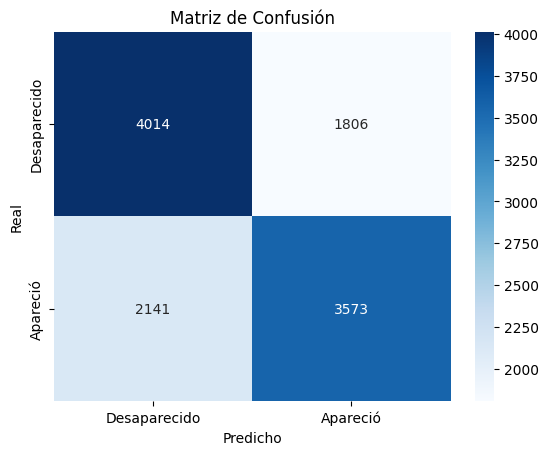

C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_22344\1765124913.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df.head(20), x='importance', y='feature', palette='viridis')


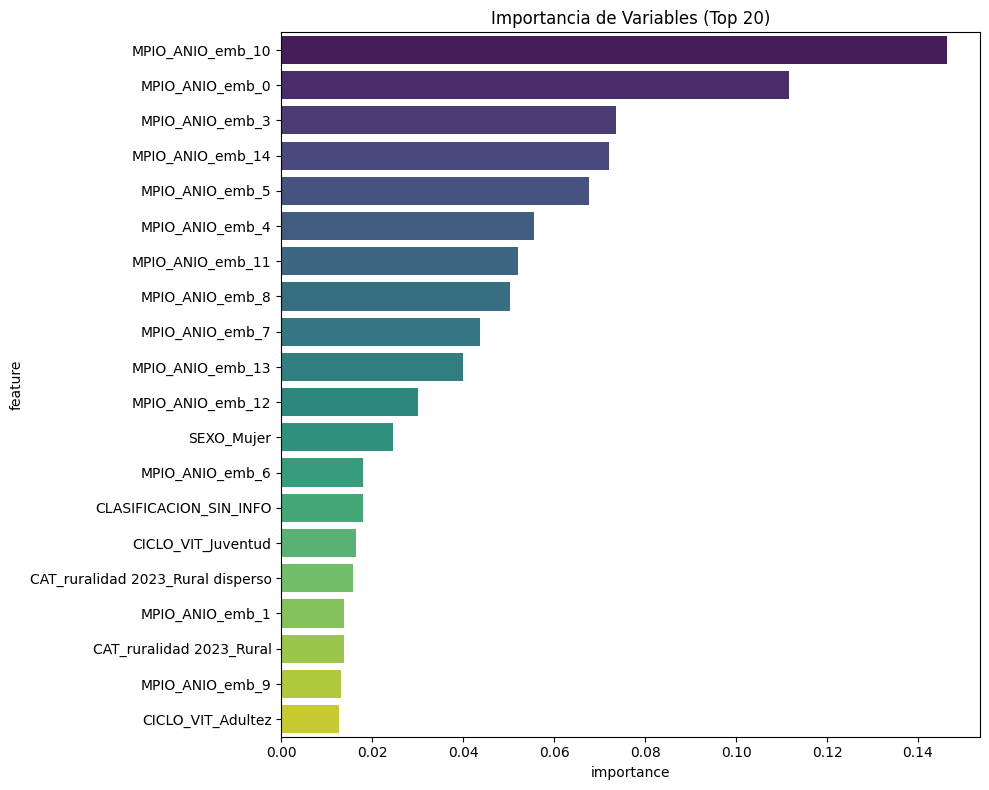

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Pipeline con XGBoost
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Espacio de hiperparámetros concreto
param_dist = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

# Randomized Search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenamiento
random_search.fit(X_train, y_train)

# Mejor modelo
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Predicciones
y_pred = best_model.predict(X_test)

# Reporte
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Desaparecido', 'Apareció'],
            yticklabels=['Desaparecido', 'Apareció'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# -------------------------------
# Importancia de variables
# -------------------------------

# Obtener nombres de variables transformadas
onehot = best_model.named_steps['preprocessing'].named_transformers_['cat']
cat_feature_names = onehot.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_cols, cat_feature_names])

# Obtener importancias
importances = best_model.named_steps['classifier'].feature_importances_

# Crear dataframe de importancias
importances_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Mostrar top 20
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df.head(20), x='importance', y='feature', palette='viridis')
plt.title('Importancia de Variables (Top 20)')
plt.tight_layout()
plt.show()



### Nuevo codigo

In [ ]:
# =========================
# Setup
# =========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, f1_score)
from scipy.stats import randint, loguniform, uniform
from xgboost import XGBClassifier

RANDOM_STATE = 42

# =========================
# (Opcional) Construir X, y
# =========================
# X = Base.drop(columns="ESTADO")
# y = Base["ESTADO"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

print("Distribución total:\n", y.value_counts(normalize=True).round(3))
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("Test:\n", y_test.value_counts(normalize=True).round(3))

# =========================
# Preprocesamiento
# =========================
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# OneHotEncoder compatible
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

transformers = []
if num_cols:
    transformers.append(("num", "passthrough", num_cols))  # árboles no requieren escala
if cat_cols:
    transformers.append(("cat", ohe, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# =========================
# Positiva + scale_pos_weight base
# =========================
# Definimos la clase positiva de forma robusta
y_vals = y_train.unique()
if np.issubdtype(type(y_vals[0]), np.number):
    pos_label = 1
else:
    pos_label = "Apareció" if "Apareció" in y_vals else sorted(y_vals)[-1]

y_train_bin = (y_train == pos_label).astype(int)
neg, pos = (y_train_bin == 0).sum(), (y_train_bin == 1).sum()
spw_base = max(1.0, neg / max(1, pos))  # razón neg/pos

# =========================
# Pipeline + CV
# =========================
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",      # si tienes GPU: "gpu_hist"
    random_state=RANDOM_STATE,
    n_estimators=500,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", xgb)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# -------------------------
# Randomized Search (amplia)
# -------------------------
param_distributions = {
    "classifier__n_estimators": randint(300, 1201),
    "classifier__learning_rate": loguniform(1e-3, 3e-1),
    "classifier__max_depth": randint(2, 13),
    "classifier__min_child_weight": randint(1, 11),
    "classifier__subsample": uniform(0.5, 0.5),          # 0.5..1.0
    "classifier__colsample_bytree": uniform(0.5, 0.5),   # 0.5..1.0
    "classifier__gamma": loguniform(1e-8, 1.0),
    "classifier__reg_alpha": loguniform(1e-8, 10.0),
    "classifier__reg_lambda": loguniform(1e-8, 10.0),
    "classifier__scale_pos_weight": [1.0, spw_base, np.sqrt(spw_base)],
    # opcional: "classifier__max_delta_step": randint(0, 6),
}

# Scoring múltiple pero refit por recall
scoring = {"recall": "recall", "f1": "f1", "roc_auc": "roc_auc"}

rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=80,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

rand_search.fit(X_train, y_train)
print("\nMejores params (Random Search):", rand_search.best_params_)
print("Mejor Recall CV (Random Search):", rand_search.cv_results_["mean_test_recall"][rand_search.best_index_].round(4))

# -------------------------
# Grid Search (refinamiento)
# -------------------------
best = rand_search.best_params_

def around_int(v, steps=(-4, -2, 0, 2, 4), lo=1, hi=None):
    vals = sorted(set([max(lo, int(v) + s) for s in steps]))
    if hi is not None:
        vals = [x for x in vals if x <= hi]
    return vals

def around_float(v, mults=(0.5, 0.75, 1.0, 1.25, 1.5), lo=0.01, hi=1.0):
    vals = sorted(set([float(v) * m for m in mults]))
    return [max(lo, min(hi, x)) for x in vals]

grid = {
    "classifier__n_estimators": sorted(set([int(best["classifier__n_estimators"]*m) for m in (0.7, 1.0, 1.3)])),
    "classifier__learning_rate": sorted(set(around_float(best["classifier__learning_rate"], mults=(0.5, 0.75, 1.0, 1.25)))),
    "classifier__max_depth": around_int(best["classifier__max_depth"], lo=2, hi=16),
    "classifier__min_child_weight": around_int(best["classifier__min_child_weight"], lo=1, hi=20),
    "classifier__subsample": sorted(set([min(1.0, max(0.5, best["classifier__subsample"] + d)) for d in (-0.2, -0.1, 0, 0.1, 0.2)])),
    "classifier__colsample_bytree": sorted(set([min(1.0, max(0.5, best["classifier__colsample_bytree"] + d)) for d in (-0.2, -0.1, 0, 0.1, 0.2)])),
    "classifier__gamma": sorted(set(around_float(best["classifier__gamma"], mults=(0.5, 1.0, 2.0), lo=1e-8, hi=5))),
    "classifier__reg_alpha": sorted(set(around_float(best["classifier__reg_alpha"], mults=(0.5, 1.0, 2.0), lo=1e-8, hi=50))),
    "classifier__reg_lambda": sorted(set(around_float(best["classifier__reg_lambda"], mults=(0.5, 1.0, 2.0), lo=1e-8, hi=50))),
    "classifier__scale_pos_weight": [best["classifier__scale_pos_weight"]],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=grid,
    scoring=scoring,
    refit="recall",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("\nMejores params (Grid Search):", grid_search.best_params_)
print("Mejor Recall CV (Grid Search):", grid_search.cv_results_["mean_test_recall"][grid_search.best_index_].round(4))

# =========================
# Entrenamiento final
# =========================
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# =========================
# Evaluación estándar (umbral 0.5)
# =========================
y_pred = best_model.predict(X_test)
print("\n== Reporte (umbral 0.5) ==")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps["classifier"].classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.named_steps["classifier"].classes_,
            yticklabels=best_model.named_steps["classifier"].classes_)
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title('Matriz de Confusión (0.5)')
plt.show()

# =========================
# ROC & AUC
# =========================
clf = best_model.named_steps["classifier"]
classes = clf.classes_

# Clase positiva robusta
if np.issubdtype(type(classes[0]), np.number):
    pos_label = 1
else:
    pos_label = "Apareció" if "Apareció" in classes else classes[-1]
pos_idx = list(classes).index(pos_label)

y_score = best_model.predict_proba(X_test)[:, pos_idx]
y_true_bin = (y_test == pos_label).astype(int)

fpr, tpr, _ = roc_curve(y_true_bin, y_score)
auc = roc_auc_score(y_true_bin, y_score)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Aleatorio")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.title("Curva ROC - XGBoost")
plt.legend(); plt.grid(True); plt.show()

# =========================
# Ajuste de umbral (max F1 sobre train)
# =========================
probs_tr = best_model.predict_proba(X_train)[:, pos_idx]
ths = np.linspace(0.05, 0.95, 181)

scores = [(t, f1_score((y_train == pos_label).astype(int), probs_tr >= t)) for t in ths]
best_t = max(scores, key=lambda x: x[1])[0]
print(f"Umbral óptimo (F1 en train): {best_t:.3f}")

probs_te = best_model.predict_proba(X_test)[:, pos_idx]
y_pred_t = (probs_te >= best_t).astype(int)

print("\n== Reporte con umbral óptimo ==")
print(classification_report((y_test == pos_label).astype(int), y_pred_t, target_names=["Negativo","Positivo"]))

cm_t = confusion_matrix((y_test == pos_label).astype(int), y_pred_t)
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title(f'Matriz (umbral={best_t:.2f})')
plt.show()


Distribución total:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Train:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Test:
 ESTADO
0    0.646
1    0.354
Name: proportion, dtype: float64
Fitting 5 folds for each of 80 candidates, totalling 400 fits

Mejores params (Random Search): {'classifier__colsample_bytree': np.float64(0.7830186052470381), 'classifier__gamma': np.float64(1.8585385818109046e-07), 'classifier__learning_rate': np.float64(0.0019845516353496095), 'classifier__max_depth': 6, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 393, 'classifier__reg_alpha': np.float64(0.5002018067635705), 'classifier__reg_lambda': np.float64(0.021523888540223697), 'classifier__scale_pos_weight': np.float64(1.82578080395847), 'classifier__subsample': np.float64(0.8816822115019555)}
Mejor Recall CV (Random Search): 0.7782
Fitting 5 folds for each of 30375 candidates, totalling 151875 fits


: 

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Separar features y target
X = base.drop(columns=['ESTADO'])
y = base['ESTADO']

# Detectar columnas numéricas (ajustar si usas más tipos)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento numérico
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)
])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)



In [161]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Pipeline RF
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_rf = {
    'model__n_estimators': [100, 200, 300,500,700],
    'model__max_depth': [None, 8,10, 20],
    'model__min_samples_split': [2, 5,8],
    'model__min_samples_leaf': [1, 2,4,7]
}

search_rf = RandomizedSearchCV(pipe_rf, param_rf, n_iter=10, cv=3, n_jobs=-1, scoring='recall', random_state=42)
search_rf.fit(X_train, y_train)
print("Best RF params:", search_rf.best_params_)

# Pipeline GB
pipe_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

search_gb = RandomizedSearchCV(pipe_gb, param_gb, n_iter=10, cv=3, n_jobs=-1, scoring='recall', random_state=42)
search_gb.fit(X_train, y_train)
print("Best GB params:", search_gb.best_params_)

# Pipeline XGB
pipe_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_xgb = {
    'model__n_estimators': [100, 200,300,500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01,0.06, 0.1],
    'model__subsample': [0.8, 1],
    'model__colsample_bytree': [0.8, 1]
}

search_xgb = RandomizedSearchCV(pipe_xgb, param_xgb, n_iter=10, cv=3, n_jobs=-1, scoring='recall', random_state=42)
search_xgb.fit(X_train, y_train)
print("Best XGB params:", search_xgb.best_params_)


Best RF params: {'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 7, 'model__max_depth': 20}


c:\Users\juan.bonilla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best GB params: {'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1}


c:\Users\juan.bonilla\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:04:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB params: {'model__subsample': 1, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}


In [162]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Usar los modelos entrenados con mejores parámetros
best_rf = search_rf.best_estimator_.named_steps['model']
best_gb = search_gb.best_estimator_.named_steps['model']
best_xgb = search_xgb.best_estimator_.named_steps['model']

# Ensamble
stacking_model = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('gb', best_gb),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Pipeline final con preprocesador + ensamble
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('stacking', stacking_model)
])

# Entrenamiento final
final_pipeline.fit(X_train, y_train)

# Evaluación
from sklearn.metrics import classification_report
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.68      0.67      4850
           1       0.67      0.65      0.66      4762

    accuracy                           0.67      9612
   macro avg       0.67      0.67      0.67      9612
weighted avg       0.67      0.67      0.67      9612



In [163]:
y_test

3313     1
30346    0
16396    0
8963     0
10898    0
        ..
34783    0
29729    1
4934     0
37611    1
9399     0
Name: ESTADO, Length: 9612, dtype: int64

In [164]:
y_pred

array([1, 1, 0, ..., 0, 1, 0], shape=(9612,))

In [165]:
X_test['Estado'] = y_test
X_test['Estado'] = y_test

In [166]:
X_test['Estado_prediccion'] = y_pred

In [167]:
X_test.to_excel(path + 'predicciones_stacking.xlsx')

PermissionError: [Errno 13] Permission denied: 'D:/Usuario/Documentos/000.Trabajo_Fin_Master/Bases_datos/predicciones_stacking.xlsx'

In [171]:
pip install imodels


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 28.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
from imodels import RuleFitClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Entrenar modelo interpretable
model = RuleFitClassifier()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Ver reglas
rules = model.rules_
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)
print(rules[["rule", "coef", "support", "importance"]].head(10))


Accuracy: 0.9120


AttributeError: 'list' object has no attribute 'coef'